## Fundamentals of Data Analysis Project

This project requires a simple linear regression analysis to be performed on a given dataset measuring the power output of a wind turbine against wind speed.

To do so, I will first import the Python packages that will be required for the task, import the dataset as a CSV file to pass it to the pandas.read_csv function to generate a dataframe object, and display the results.

In [10]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


pd.options.display.max_rows = 1000

df = pd.read_csv("../powerproduction.csv")
df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


Next I use Seaborn to generate several plots based on the dataset to see if there are any immediately apparent relationships between the variables.

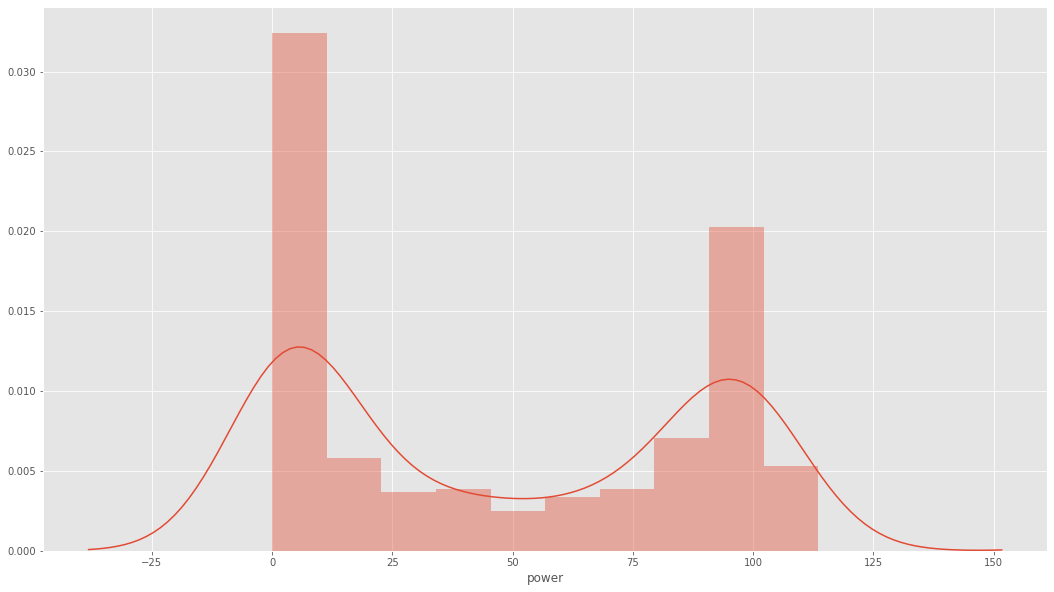

In [6]:
sns.distplot(df['power'], bins=10)

Generating a distribution plot for the **power** variable gives a plot with two distinct peaks, one at 0 watts and a smaller, wider curve between 75 and 110 watts. We can initially speculate that if most values cluster around 0W, then lower wind speeds generate close to no power until a certain threshold speed is reached. The second clustering in the higher values, with relatively low frequencies for intermediate power values, may suggest that once the threshold speed is reached, power output quickly approaches a maximum range. When the two variables are plotted against each other, we would thus expect a plot with a fairly high positive slope, indicating a linear relationship between the variables.

Text(0, 0.5, 'power')

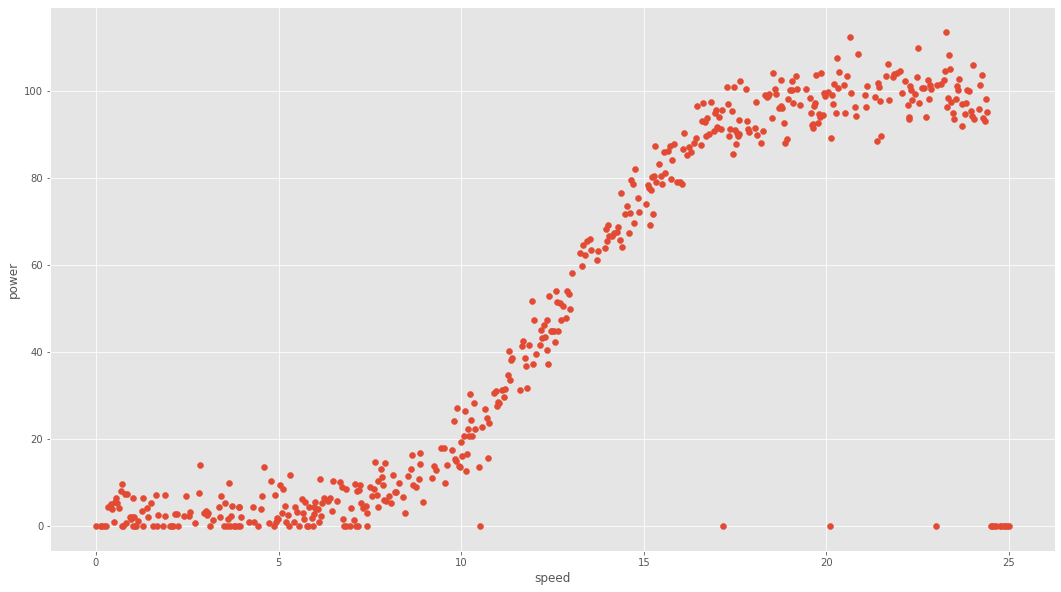

In [7]:
plt.scatter(x = df['speed'], y=df['power'])
plt.xlabel('speed')
plt.ylabel('power')

As suggested by the distribution plot above, most values cluster initially below 20W until a wind speed of 10kmh is reached, followed by a rapid rise in power output in the 10kmh to approx 15kmh range, with a plateau of 80-110W for speeds above approx 17-18kmh. After a power output peak at approx 22-24kmh, output in fact seems to begin to decline towards 25kmh, perhaps suggesting an upper limit to power output.

Finally, I used the code from [this](https://github.com/donalbuggy/fundamentalsOfDataAnalysis/blob/main/fundamentalsOfDataAnalysisTasks.ipynb) previous assignment to get the coefficient values for the plot and the best-fit line.

Coefficient values: [  4.91759567 -13.89990263]


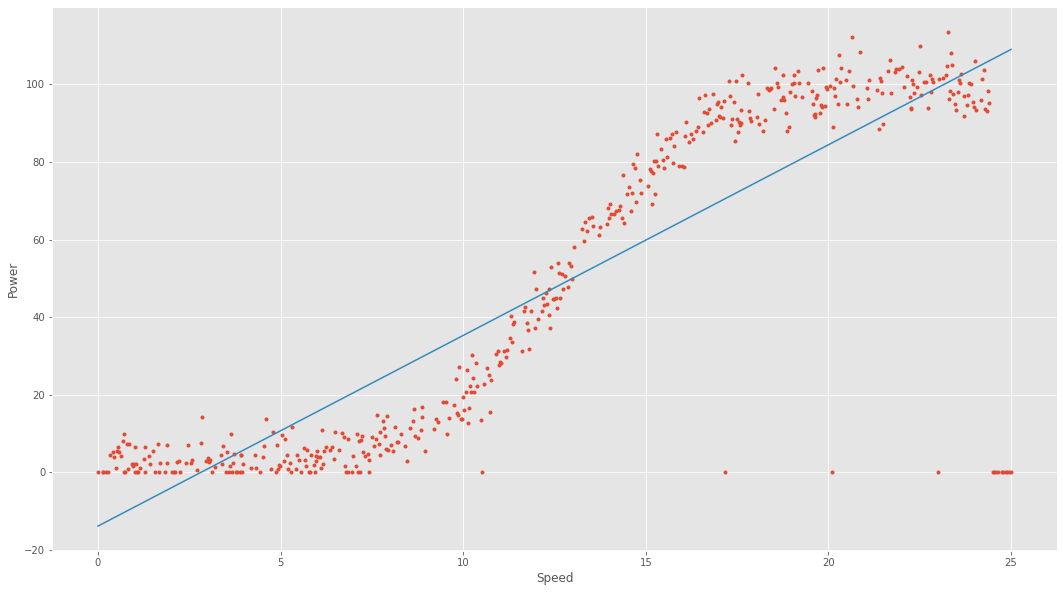

In [5]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,10)

x = df["speed"]
y = df["power"]
coeff = np.polyfit(x,y,1)
print("Coefficient values: " + str(coeff))
plt.plot(x,y, '.')
plt.plot(x, coeff[0] * x + coeff[1], '-')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

The linear regression formula is given as $ \hat{y} = \beta{_0} + \beta{_1}x $, where $ \beta{_0} $ is the is the y-intercept of the regression line (the point where a given value on the x-axis meets the best-fit line on the y-axis, and $ \beta{_1} $ is the the slope of the line. These correspond to the coefficient values coeff[0] and coeff[1] in the code above.

Following the model for calculating simple linear regression given in [this walkthrough](https://www.statology.org/linear-regression-python/), an estimated linear regression equation can be derived using the following function.

In [19]:
def findPower(x):
    powerVal = coeff[1] + (coeff[0] * x)
    return powerVal

findPower(df['speed'])

0      -13.899903
1      -13.285203
2      -13.162263
3      -12.793444
4      -12.547564
5      -12.301684
6      -11.932864
7      -11.686985
8      -11.436187
9      -11.313247
10     -11.190307
11     -11.067368
12     -10.821488
13     -10.575608
14     -10.452668
15     -10.329728
16     -10.206788
17      -9.960909
18      -9.837969
19      -9.715029
20      -9.346209
21      -9.223269
22      -9.100329
23      -8.977389
24      -8.854449
25      -8.731510
26      -8.608570
27      -8.485630
28      -8.239750
29      -7.747990
30      -7.625051
31      -7.502111
32      -7.010351
33      -6.887411
34      -6.513674
35      -6.267794
36      -5.776035
37      -5.653095
38      -5.530155
39      -4.915455
40      -4.669576
41      -4.546636
42      -3.931936
43      -3.686056
44      -3.563117
45      -3.194297
46      -2.948417
47      -2.825477
48      -2.087838
49      -1.719018
50      -1.345281
51      -1.222341
52      -0.607642
53       0.007058
54       0.129998
55       0